# comparing models behavior with participants behavior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"
import seaborn as sns 
import ast
from scipy.stats import pearsonr

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import pearsonr
from statsmodels.stats.multitest import fdrcorrection
import warnings
warnings.filterwarnings("ignore")


In [2]:
output_dir = r"15_RL_agent_TDlearn_output_behavior_softmax"
os.makedirs(output_dir, exist_ok=True)


folder_path_participants = 'data_risk_added_epileptic'
folder_path_numbers = '12_RL_agent_TDlearn_output_softmax/model_behavior'
folder_path_colors_numbers = '13_RL_agent_TDlearn_output_softmax/model_behavior'


df_participants = []
df_numbers = []
df_colors_numbers = []


def find_matching_csv(folder_path, df_list):
            for csv_file in os.listdir(folder_path):
                if clean_name in csv_file and csv_file.endswith('.csv'):
                    csv_path = os.path.join(folder_path, csv_file)
                    df_csv = pd.read_csv(csv_path)
                    df_list.append(df_csv)





for file_name in os.listdir(folder_path_participants):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path_participants, file_name)
        df = pd.read_csv(file_path)
        df = df[df['outcome'].str.lower() != 'na'].reset_index(drop=True)  
        df_participants.append(df)

        clean_name = file_name.removeprefix("task_data_").removesuffix(".csv")


        find_matching_csv(folder_path_numbers, df_numbers)
        find_matching_csv(folder_path_colors_numbers, df_colors_numbers)


distributions_map = {"uniform": 0, "low": 1, "high": 2}
actions = {"arrowdown": 0, "arrowup": 1}

In [3]:
df_participants[1].head(5)

,arrowRT,distribution,interTrialInterval,outcome,myCard,yourCard,spaceRT,totalReward,trialIndex,trialType,choice,block,timeoutRepeat,is_within_IQR,risk
0,945,uniform,778,lose,1,3,5159,9.5,0,response,arrowup,1,0,0,0.000
1,1203,uniform,872,lose,2,5,100,9,2,response,arrowup,1,0,1,0.125
2,1003,uniform,965,lose,4,9,208,8.5,3,response,arrowup,1,0,1,0.375
3,1562,uniform,807,win,8,3,4908,9,4,response,arrowup,1,0,0,0.125
4,875,uniform,868,win,4,9,1026,9.5,5,response,arrowdown,1,0,1,0.375


In [4]:
df_numbers[2].head()

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val
0,1,0,9.5,10.5,"[[-0.005470631663443085, -0.000671831958668449..."
1,0,1,9.0,11.0,"[[-0.005470631663443085, -0.000671831958668449..."
2,1,0,8.5,11.5,"[[0.026656247803119665, -0.000671831958668449]..."
3,1,0,9.0,11.0,"[[0.026656247803119665, -0.000671831958668449]..."
4,0,1,8.5,11.5,"[[0.026656247803119665, -0.000671831958668449]..."


In [5]:
df_colors_numbers[2].head(5)

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val
0,1,0,9.5,10.5,"[[[-0.01962952508513846, -0.001481473591331204..."
1,0,1,9.0,11.0,"[[[-0.01962952508513846, -0.001481473591331204..."
2,0,0,9.5,11.5,"[[[0.055662128486895696, -0.001481473591331204..."
3,1,0,10.0,11.0,"[[[0.055662128486895696, -0.001481473591331204..."
4,1,1,10.5,11.5,"[[[0.055662128486895696, -0.001481473591331204..."


In [6]:
spaceRT_participants = []
arrowRT_participants = []

delta_q_val_uniform = []
delta_q_val_low = []
delta_q_val_high = []



for df in df_participants:
    # Normalize spaceRT
    spaceRT = pd.to_numeric(df['spaceRT'], errors='coerce')
    spaceRT_normalized = spaceRT / np.nanmean(spaceRT)
    spaceRT_participants.append(spaceRT_normalized.values)

    # Normalize arrowRT
    arrowRT = pd.to_numeric(df['arrowRT'], errors='coerce')
    arrowRT_normalized = arrowRT / np.nanmean(arrowRT)
    arrowRT_participants.append(arrowRT_normalized.values)


spaceRT_participants = np.array(spaceRT_participants)
arrowRT_participants = np.array(arrowRT_participants)

num_participants = spaceRT_participants.shape[0]

correlations_spaceRT = np.zeros((num_participants, 3))
correlations_arrowRT = np.zeros((num_participants, 3))
p_values_spaceRT = np.zeros((num_participants, 3))
p_values_arrowRT = np.zeros((num_participants, 3))

xticklabels = [f'p{i+1}' for i in range(num_participants)]
yticklabels = ['uniform', 'low', 'high']

# NUMBERS abs(delta q values) correlatation with spaceRT and arrowRT 

In [7]:
delta_q_val_1 = []
delta_q_val_2 = []
delta_q_val_3 = []
delta_q_val_4 = []
delta_q_val_5 = []
delta_q_val_6 = []
delta_q_val_7 = []
delta_q_val_8 = []
delta_q_val_9 = []

for df in df_numbers:
    
    delta_1 = []
    delta_2 = []
    delta_3 = []
    delta_4 = []
    delta_5 = []
    delta_6 = []
    delta_7 = []
    delta_8 = []
    delta_9 = []
    
    temp_df = df['q_val']
    for q_vals in temp_df:
        
        temp_vec2 = np.array(ast.literal_eval(q_vals)) 
        delta = temp_vec2[:, actions["arrowup"]] - temp_vec2[:, actions["arrowdown"]]
        delta_1.append(delta[0])
        delta_2.append(delta[1])
        delta_3.append(delta[2])
        delta_4.append(delta[3])
        delta_5.append(delta[4])
        delta_6.append(delta[5])
        delta_7.append(delta[6])
        delta_8.append(delta[7])
        delta_9.append(delta[8])
        
        

    delta_q_val_1.append(delta_1)
    delta_q_val_2.append(delta_2)
    delta_q_val_3.append(delta_3)
    delta_q_val_4.append(delta_4)
    delta_q_val_5.append(delta_5)
    delta_q_val_6.append(delta_6)
    delta_q_val_7.append(delta_7)
    delta_q_val_8.append(delta_8)
    delta_q_val_9.append(delta_9)
        
    


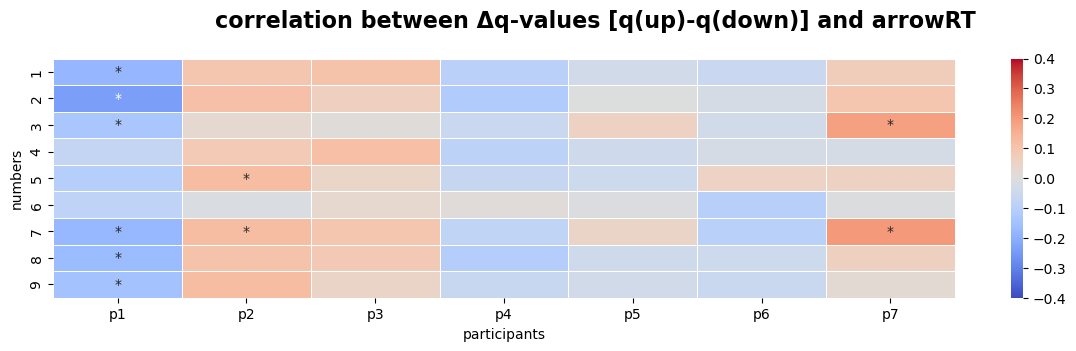

In [8]:
# delta_q_val_1 = np.array(delta_q_val_1)
# delta_q_val_2 = np.array(delta_q_val_2)
# delta_q_val_3 = np.array(delta_q_val_3)
# delta_q_val_4 = np.array(delta_q_val_4)
# delta_q_val_5 = np.array(delta_q_val_5)
# delta_q_val_6 = np.array(delta_q_val_6)
# delta_q_val_7 = np.array(delta_q_val_7)
# delta_q_val_8 = np.array(delta_q_val_8)
# delta_q_val_9 = np.array(delta_q_val_9)

delta_q_val_1 = np.array(np.abs(delta_q_val_1))
delta_q_val_2 = np.array(np.abs(delta_q_val_2))
delta_q_val_3 = np.array(np.abs(delta_q_val_3))
delta_q_val_4 = np.array(np.abs(delta_q_val_4))
delta_q_val_5 = np.array(np.abs(delta_q_val_5))
delta_q_val_6 = np.array(np.abs(delta_q_val_6))
delta_q_val_7 = np.array(np.abs(delta_q_val_7))
delta_q_val_8 = np.array(np.abs(delta_q_val_8))
delta_q_val_9 = np.array(np.abs(delta_q_val_9))

# ─────────────────────────────────────────────────────────────────────────
# 1) Compute correlations for spaceRT
# ─────────────────────────────────────────────────────────────────────────
# correlations_numbers_space = np.zeros((num_participants, 9))
# correlations_numbers_pval_space = np.zeros((num_participants, 9))

# for i in range(num_participants):
#     corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_1[i, :])
#     correlations_numbers_space[i, 0] = corr
#     correlations_numbers_pval_space[i, 0] = pval

#     corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_2[i, :])
#     correlations_numbers_space[i, 1] = corr
#     correlations_numbers_pval_space[i, 1] = pval

#     corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_3[i, :])
#     correlations_numbers_space[i, 2] = corr
#     correlations_numbers_pval_space[i, 2] = pval

#     corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_4[i, :])
#     correlations_numbers_space[i, 3] = corr
#     correlations_numbers_pval_space[i, 3] = pval

#     corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_5[i, :])
#     correlations_numbers_space[i, 4] = corr
#     correlations_numbers_pval_space[i, 4] = pval

#     corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_6[i, :])
#     correlations_numbers_space[i, 5] = corr
#     correlations_numbers_pval_space[i, 5] = pval

#     corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_7[i, :])
#     correlations_numbers_space[i, 6] = corr
#     correlations_numbers_pval_space[i, 6] = pval

#     corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_8[i, :])
#     correlations_numbers_space[i, 7] = corr
#     correlations_numbers_pval_space[i, 7] = pval

#     corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_9[i, :])
#     correlations_numbers_space[i, 8] = corr
#     correlations_numbers_pval_space[i, 8] = pval



# correlations_numbers_space = correlations_numbers_space.T
# correlations_numbers_pval_space = correlations_numbers_pval_space.T



# annots_space = np.array([
#     ["*" if correlations_numbers_pval_space[row, col] < 0.05 else "" 
#      for col in range(num_participants)]
#     for row in range(9)
# ])

# ─────────────────────────────────────────────────────────────────────────
# 2) Compute correlations for arrowRT
# ─────────────────────────────────────────────────────────────────────────
correlations_numbers_arrow = np.zeros((num_participants, 9))
correlations_numbers_pval_arrow = np.zeros((num_participants, 9))

for i in range(num_participants):
    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_1[i, :])
    correlations_numbers_arrow[i, 0] = corr
    correlations_numbers_pval_arrow[i, 0] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_2[i, :])
    correlations_numbers_arrow[i, 1] = corr
    correlations_numbers_pval_arrow[i, 1] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_3[i, :])
    correlations_numbers_arrow[i, 2] = corr
    correlations_numbers_pval_arrow[i, 2] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_4[i, :])
    correlations_numbers_arrow[i, 3] = corr
    correlations_numbers_pval_arrow[i, 3] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_5[i, :])
    correlations_numbers_arrow[i, 4] = corr
    correlations_numbers_pval_arrow[i, 4] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_6[i, :])
    correlations_numbers_arrow[i, 5] = corr
    correlations_numbers_pval_arrow[i, 5] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_7[i, :])
    correlations_numbers_arrow[i, 6] = corr
    correlations_numbers_pval_arrow[i, 6] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_8[i, :])
    correlations_numbers_arrow[i, 7] = corr
    correlations_numbers_pval_arrow[i, 7] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_9[i, :])
    correlations_numbers_arrow[i, 8] = corr
    correlations_numbers_pval_arrow[i, 8] = pval


correlations_numbers_arrow = correlations_numbers_arrow.T
correlations_numbers_pval_arrow = correlations_numbers_pval_arrow.T


annots_arrow = np.array([
    ["*" if correlations_numbers_pval_arrow[row, col] < 0.05 else "" 
     for col in range(num_participants)]
    for row in range(9)
])

# ─────────────────────────────────────────────────────────────────────────
# 3) Plot both heatmaps in subplots
# ─────────────────────────────────────────────────────────────────────────
fig, axes = plt.subplots(nrows=1, figsize=(12, 3.5))


# sns.heatmap(
#     correlations_numbers_space,
#     cmap='coolwarm',
#     linewidths=0.5,
#     xticklabels=[f'p{i+1}' for i in range(num_participants)],
#     yticklabels=list(range(1, 10)),
#     cbar=True,
#     vmin=-0.4,
#     vmax=0.4,
#     annot=annots_space,
#     fmt='',
#     ax=axes[0]
# )
# # axes[0].set_xlabel("participants")
# axes[0].set_ylabel("numbers")
# axes[0].set_title("spaceRT")
sns.heatmap(
    correlations_numbers_arrow,
    cmap='coolwarm',
    linewidths=0.5,
    xticklabels=[f'p{i+1}' for i in range(num_participants)],
    yticklabels=list(range(1, 10)),
    cbar=True,
    vmin=-0.4,
    vmax=0.4,
    annot=annots_arrow,
    fmt='',
    ax=axes
)
axes.set_xlabel("participants")
axes.set_ylabel("numbers")
# axes.set_title("arrowRT")
plt.tight_layout()
fig.subplots_adjust(top=0.85)  # Add space between figure and title
fig.suptitle('correlation between Δq-values [q(up)-q(down)] and arrowRT', 
             fontsize=16, fontweight='bold', y=0.99)

filename = os.path.join(output_dir, "correlation_qVal_arrowRT_numbers.pdf")
plt.savefig(filename, format='pdf')
# plt.close()


# BOTH abs(delta q values) correlatation with spaceRT and arrowRT 

In [9]:

delta_q_val_1_both = []
delta_q_val_2_both = []
delta_q_val_3_both = []
delta_q_val_4_both = []
delta_q_val_5_both = []
delta_q_val_6_both = []
delta_q_val_7_both = []
delta_q_val_8_both = []
delta_q_val_9_both = []

for df in df_colors_numbers:
    

    delta_1_both = []
    delta_2_both = []
    delta_3_both = []
    delta_4_both = []
    delta_5_both = []
    delta_6_both = []
    delta_7_both = []
    delta_8_both = []
    delta_9_both = []
    
    temp_df = df['q_val']
    for q_vals in temp_df:
        
        temp_vec2 = np.array(ast.literal_eval(q_vals)) 
        delta = temp_vec2[:, :, actions["arrowup"]].squeeze() - temp_vec2[:, :, actions["arrowdown"]].squeeze()
        delta_1_both.append(delta[0][:])
        delta_2_both.append(delta[1][:])
        delta_3_both.append(delta[2][:])
        delta_4_both.append(delta[3][:])
        delta_5_both.append(delta[4][:])
        delta_6_both.append(delta[5][:])
        delta_7_both.append(delta[6][:])
        delta_8_both.append(delta[7][:])
        delta_9_both.append(delta[8][:])
        
        

    delta_q_val_1_both.append(delta_1_both)
    delta_q_val_2_both.append(delta_2_both)
    delta_q_val_3_both.append(delta_3_both)
    delta_q_val_4_both.append(delta_4_both)
    delta_q_val_5_both.append(delta_5_both)
    delta_q_val_6_both.append(delta_6_both)
    delta_q_val_7_both.append(delta_7_both)
    delta_q_val_8_both.append(delta_8_both)
    delta_q_val_9_both.append(delta_9_both)
        
    


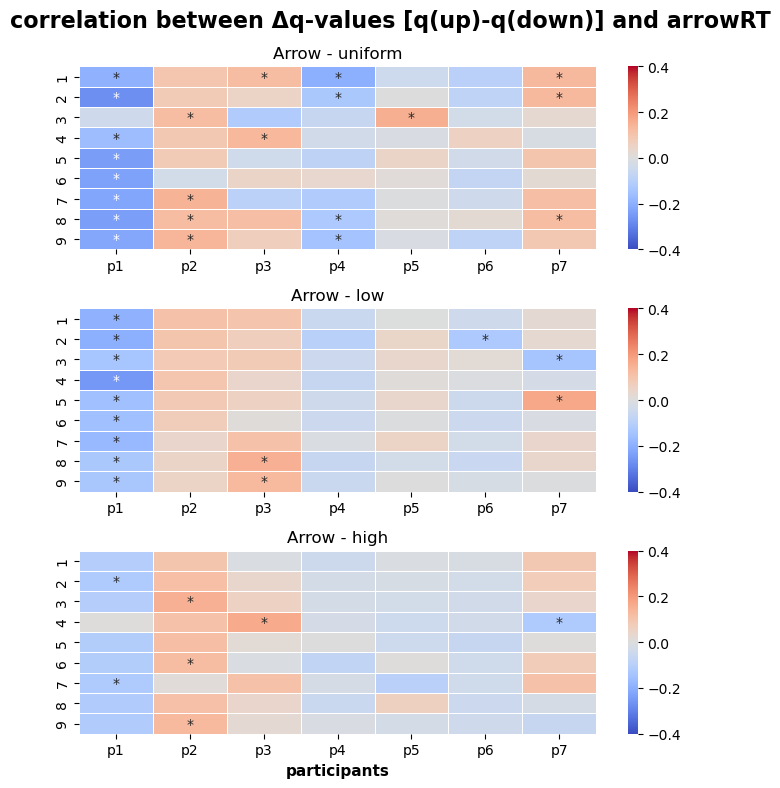

In [10]:
# delta_q_val_1_both = np.array(delta_q_val_1_both)
# delta_q_val_2_both = np.array(delta_q_val_2_both)
# delta_q_val_3_both = np.array(delta_q_val_3_both)
# delta_q_val_4_both = np.array(delta_q_val_4_both)
# delta_q_val_5_both = np.array(delta_q_val_5_both)
# delta_q_val_6_both = np.array(delta_q_val_6_both)
# delta_q_val_7_both = np.array(delta_q_val_7_both)
# delta_q_val_8_both = np.array(delta_q_val_8_both)
# delta_q_val_9_both = np.array(delta_q_val_9_both)

delta_q_val_1_both = np.abs(np.array(delta_q_val_1_both))
delta_q_val_2_both = np.abs(np.array(delta_q_val_2_both))
delta_q_val_3_both = np.abs(np.array(delta_q_val_3_both))
delta_q_val_4_both = np.abs(np.array(delta_q_val_4_both))
delta_q_val_5_both = np.abs(np.array(delta_q_val_5_both))
delta_q_val_6_both = np.abs(np.array(delta_q_val_6_both))
delta_q_val_7_both = np.abs(np.array(delta_q_val_7_both))
delta_q_val_8_both = np.abs(np.array(delta_q_val_8_both))
delta_q_val_9_both = np.abs(np.array(delta_q_val_9_both))

# Create storage for correlations and p-values for each RT type
correlations_arrow = np.zeros((num_participants, 9, len(distributions_map)))
pvals_arrow = np.zeros((num_participants, 9, len(distributions_map)))

# --- Compute Correlations (Arrow RT) ---
for i in range(num_participants):
    # number 1
    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_arrow[i, 0, distributions_map["uniform"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["uniform"]])
    pvals_arrow[i, 0, distributions_map["uniform"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["low"]])[0, 1]
    correlations_arrow[i, 0, distributions_map["low"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["low"]])
    pvals_arrow[i, 0, distributions_map["low"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["high"]])[0, 1]
    correlations_arrow[i, 0, distributions_map["high"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["high"]])
    pvals_arrow[i, 0, distributions_map["high"]] = pval

    # Repeat for numbers 2 through 9
    for num in range(2, 10):
        delta_q_val_both = eval(f"delta_q_val_{num}_both")
        corr = np.corrcoef(arrowRT_participants[i, :],
                           delta_q_val_both[i, :, distributions_map["uniform"]])[0, 1]
        correlations_arrow[i, num - 1, distributions_map["uniform"]] = corr
        _, pval = pearsonr(arrowRT_participants[i, :],
                           delta_q_val_both[i, :, distributions_map["uniform"]])
        pvals_arrow[i, num - 1, distributions_map["uniform"]] = pval

        corr = np.corrcoef(arrowRT_participants[i, :],
                           delta_q_val_both[i, :, distributions_map["low"]])[0, 1]
        correlations_arrow[i, num - 1, distributions_map["low"]] = corr
        _, pval = pearsonr(arrowRT_participants[i, :],
                           delta_q_val_both[i, :, distributions_map["low"]])
        pvals_arrow[i, num - 1, distributions_map["low"]] = pval

        corr = np.corrcoef(arrowRT_participants[i, :],
                           delta_q_val_both[i, :, distributions_map["high"]])[0, 1]
        correlations_arrow[i, num - 1, distributions_map["high"]] = corr
        _, pval = pearsonr(arrowRT_participants[i, :],
                           delta_q_val_both[i, :, distributions_map["high"]])
        pvals_arrow[i, num - 1, distributions_map["high"]] = pval

# ----------------------------------------------------------
# ----------------------------------------------------------
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 8))  # 3x1 layout
labels = ['uniform', 'low', 'high']

for row_idx, dist_label in enumerate(labels):
    # ARROW
    ax_arrow = axes[row_idx]
    data_arrow = correlations_arrow[:, :, distributions_map[dist_label]].T

    # Make an annotation array (same shape) for significance
    annots_arrow = np.empty((9, num_participants), dtype=object)
    for r in range(9):
        for c in range(num_participants):
            if pvals_arrow[c, r, distributions_map[dist_label]] < 0.05:
                annots_arrow[r, c] = '*'
            else:
                annots_arrow[r, c] = ''

    sns.heatmap(
        data_arrow,
        ax=ax_arrow,
        cmap='coolwarm',
        linewidths=0.5,
        xticklabels=[f'p{i+1}' for i in range(num_participants)],
        yticklabels=list(range(1, 10)),
        cbar=True,
        vmin=-0.4, vmax=0.4,
        annot=annots_arrow, fmt=""
    )
    ax_arrow.set_title(f"Arrow - {dist_label}")
    if row_idx == 2:
        ax_arrow.set_xlabel("participants", fontsize=11, fontweight='bold')

fig.suptitle('correlation between Δq-values [q(up)-q(down)] and arrowRT', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

filename = os.path.join(output_dir, "correlation_qVal_arrow_RT_both.pdf")
plt.savefig(filename, format='pdf')
plt.show()


# delta arrowRT vs risk correlations

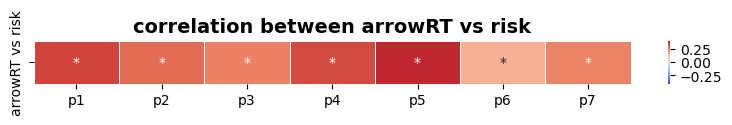

In [11]:
risk_values = []

for df in df_participants:
    risk_values.append(np.array(df['risk'], dtype=float))

risk_values = np.array(risk_values)

correlations_arrowRT_risk = np.zeros(num_participants)
p_values_arrowRT_risk = np.zeros(num_participants)

for i in range(num_participants):
    corr, p_val = pearsonr(arrowRT_participants[i, :], risk_values[i, :])
    correlations_arrowRT_risk[i] = corr
    p_values_arrowRT_risk[i] = p_val

# Create annotations for significance
annot_arrowRT_risk = np.array(["*" if p_values_arrowRT_risk[i] < 0.05 else "" for i in range(num_participants)])


fig, ax = plt.subplots(figsize=(8, 1.2))
sns.heatmap(correlations_arrowRT_risk.reshape(1, -1), cmap='coolwarm', linewidths=0.5,
            xticklabels=[f'p{i+1}' for i in range(num_participants)], yticklabels=['arrowRT vs risk'],
            cbar=True, vmin=-0.4, vmax=0.4, annot=annot_arrowRT_risk.reshape(1, -1), fmt='', ax=ax)

ax.set_title("correlation between arrowRT vs risk", fontsize=14, fontweight='bold')
# fig.suptitle('Correlation between arrowRT and risk', fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
filename = os.path.join(output_dir, "correlation_arrowRT_risk.pdf")
plt.savefig(filename, format='pdf')
plt.show()

# delta qval vs risk correlations

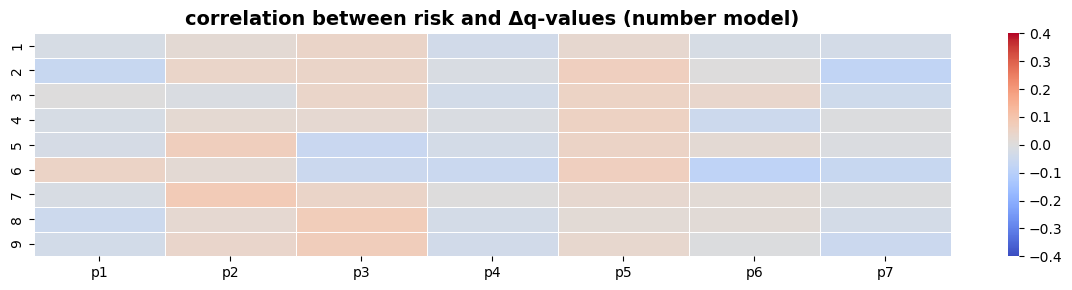

In [12]:
correlations_risk_delta_q_number = np.zeros((num_participants, 9))
p_values_risk_delta_q_number = np.zeros((num_participants, 9))

for i in range(num_participants):
    for j, delta_q_val in enumerate([delta_q_val_1, delta_q_val_2, delta_q_val_3, delta_q_val_4, delta_q_val_5, delta_q_val_6, delta_q_val_7, delta_q_val_8, delta_q_val_9]):
        corr, p_val = pearsonr(risk_values[i, :], delta_q_val[i, :])
        correlations_risk_delta_q_number[i, j] = corr
        p_values_risk_delta_q_number[i, j] = p_val

# Transpose for better visualization
correlations_risk_delta_q_number = correlations_risk_delta_q_number.T
p_values_risk_delta_q_number = p_values_risk_delta_q_number.T

# Create annotations for significance
annot_risk_delta_q_number = np.array([["*" if p_values_risk_delta_q_number[j, i] < 0.05 else "" 
                                       for i in range(num_participants)] for j in range(9)])

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 3))
sns.heatmap(correlations_risk_delta_q_number, cmap='coolwarm', linewidths=0.5,
            xticklabels=xticklabels, yticklabels=list(range(1, 10)),
            cbar=True, vmin=-0.4, vmax=0.4, annot=annot_risk_delta_q_number, fmt='', ax=ax)

ax.set_title("correlation between risk and Δq-values (number model)", fontsize=14, fontweight='bold')
plt.tight_layout()

filename = os.path.join(output_dir, "correlation_risk_deltaQval_number.pdf")
plt.savefig(filename, format='pdf')
plt.show()

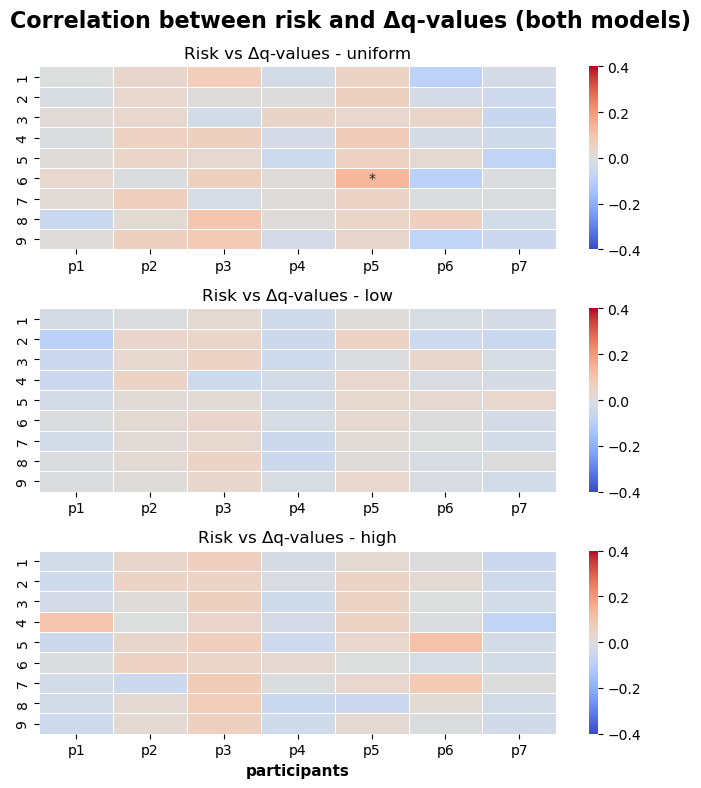

In [13]:
correlations_risk_delta_q_both = np.zeros((num_participants, 9, len(distributions_map)))
p_values_risk_delta_q_both = np.zeros((num_participants, 9, len(distributions_map)))

# Compute correlations for each participant, number, and distribution
for i in range(num_participants):
    for num in range(1, 10):  # Iterate over numbers 1 to 9
        delta_q_val_both = eval(f"delta_q_val_{num}_both")
        for dist_label, dist_idx in distributions_map.items():
            corr, p_val = pearsonr(risk_values[i, :], delta_q_val_both[i, :, dist_idx])
            correlations_risk_delta_q_both[i, num - 1, dist_idx] = corr
            p_values_risk_delta_q_both[i, num - 1, dist_idx] = p_val

# Plot the heatmaps for each distribution
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 8))  # 3x1 layout
labels = ['uniform', 'low', 'high']

for row_idx, dist_label in enumerate(labels):
    ax = axes[row_idx]
    data = correlations_risk_delta_q_both[:, :, distributions_map[dist_label]].T

    # Create annotations for significance
    annots = np.empty((9, num_participants), dtype=object)
    for r in range(9):
        for c in range(num_participants):
            if p_values_risk_delta_q_both[c, r, distributions_map[dist_label]] < 0.05:
                annots[r, c] = '*'
            else:
                annots[r, c] = ''

    sns.heatmap(
        data,
        ax=ax,
        cmap='coolwarm',
        linewidths=0.5,
        xticklabels=xticklabels,
        yticklabels=list(range(1, 10)),
        cbar=True,
        vmin=-0.4, vmax=0.4,
        annot=annots, fmt=""
    )
    ax.set_title(f"Risk vs Δq-values - {dist_label}")
    if row_idx == 2:
        ax.set_xlabel("participants", fontsize=11, fontweight='bold')

fig.suptitle('Correlation between risk and Δq-values (both models)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

filename = os.path.join(output_dir, "correlation_risk_deltaQval_both.pdf")
plt.savefig(filename, format='pdf')
plt.show()